In [ ]:
# # Dataset Information
# This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

# Content
# There are 25 variables:

# ID: ID of each client
# LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
# SEX: Gender (1=male, 2=female)
# EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
# MARRIAGE: Marital status (1=married, 2=single, 3=others)
# AGE: Age in years
# PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
# PAY_2: Repayment status in August, 2005 (scale same as above)
# PAY_3: Repayment status in July, 2005 (scale same as above)
# PAY_4: Repayment status in June, 2005 (scale same as above)
# PAY_5: Repayment status in May, 2005 (scale same as above)
# PAY_6: Repayment status in April, 2005 (scale same as above)
# BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
# BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
# BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
# BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
# BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
# BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
# PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
# PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
# PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
# PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
# PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
# PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
# default.payment.next.month: Default payment (1=yes, 0=no)

In [23]:
# Import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('max_colwidth', 400)

In [5]:
# Read the data into a Pandas DataFrame
customer_df=pd.read_csv('Resources/credit_card_demographics.csv')
customer_df.head()

,customer_id,gender,education,marital_status,age
0,1,F,university,married,24
1,2,F,university,single,26
2,3,F,university,single,34
3,4,F,university,married,37
4,5,M,university,married,57


In [6]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     30000 non-null  int64 
 1   gender          30000 non-null  object
 2   education       30000 non-null  object
 3   marital_status  29946 non-null  object
 4   age             30000 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.1+ MB


In [9]:
payments_df = pd.read_csv('Resources/credit_card_payments.csv')

In [10]:
payments_df.head()

,customer_id,credit_limit,repayment_status_sept,repayment_status_aug,repayment_status_jul,repayment_status_jun,repayment_status_may,repayment_status_april,statement_bal_aug,statement_bal_jul,...,statement_bal_may,statement_bal_April,statement_bal_march,payment_aug,payment_july,payment_june,payment_may,payment_april,payment_mar,default_payment_next_month
0,1,20000.0,2,2,-1,-1,-2,-2,3913.0,3102.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,-1,2,0,0,0,2,2682.0,1725.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,0,0,0,0,0,0,29239.0,14027.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,0,0,0,0,0,0,46990.0,48233.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,-1,0,-1,0,0,0,8617.0,5670.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [11]:
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 30000 non-null  int64  
 1   credit_limit                30000 non-null  float64
 2   repayment_status_sept       30000 non-null  int64  
 3   repayment_status_aug        30000 non-null  int64  
 4   repayment_status_jul        30000 non-null  int64  
 5   repayment_status_jun        30000 non-null  int64  
 6   repayment_status_may        30000 non-null  int64  
 7   repayment_status_april      30000 non-null  int64  
 8   statement_bal_aug           30000 non-null  float64
 9   statement_bal_jul           30000 non-null  float64
 10  statement_bal_june          30000 non-null  float64
 11  statement_bal_may           30000 non-null  float64
 12  statement_bal_April         30000 non-null  float64
 13  statement_bal_march         300

In [16]:
merged_df=pd.merge(customer_df,payments_df,on=['customer_id'])

In [17]:
merged_df.head()

,customer_id,gender,education,marital_status,age,credit_limit,repayment_status_sept,repayment_status_aug,repayment_status_jul,repayment_status_jun,...,statement_bal_may,statement_bal_April,statement_bal_march,payment_aug,payment_july,payment_june,payment_may,payment_april,payment_mar,default_payment_next_month
0,1,F,university,married,24,20000.0,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,F,university,single,26,120000.0,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,F,university,single,34,90000.0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,F,university,married,37,50000.0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,M,university,married,57,50000.0,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


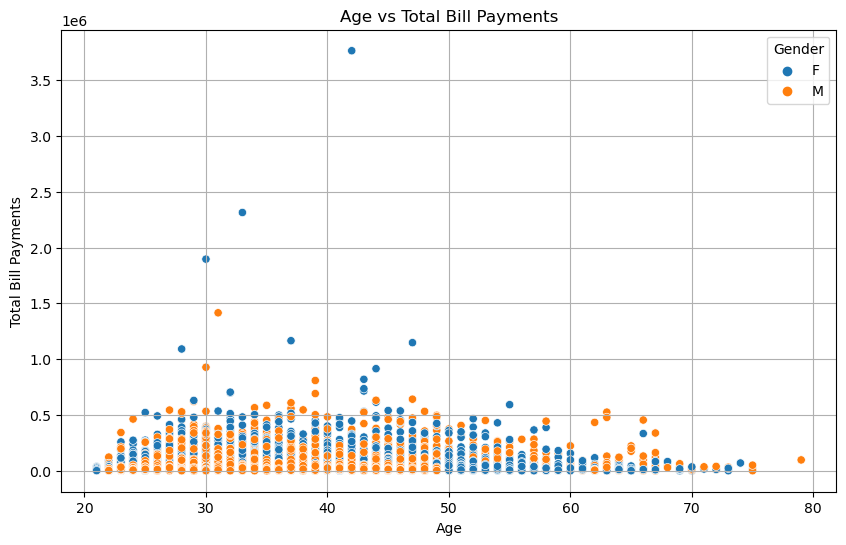

In [24]:
merged_df['total_payments'] = merged_df[['payment_aug', 'payment_july', 'payment_june', 'payment_may', 'payment_april', 'payment_mar']].sum(axis=1)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='age', y='total_payments', hue='gender')
plt.title('Age vs Total Bill Payments')
plt.xlabel('Age')
plt.ylabel('Total Bill Payments')
plt.legend(title='Gender')
plt.grid(True)
plt.show()

C:\Users\Srinika\AppData\Local\Temp\ipykernel_26916\2188581386.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_payments = merged_df.groupby(['age_group', 'gender'])['total_payments'].mean().unstack()


Average payments by age group and gender:
gender                F             M
age_group                            
18-30      26570.101241  27267.698594
31-40      35567.999528  35590.804951
41-50      35286.801346  33762.048705
51-60      27677.089524  28493.625132
60+        23170.585366  42003.409396
Correlation between age and total payments: 0.04


<Figure size 1200x600 with 0 Axes>

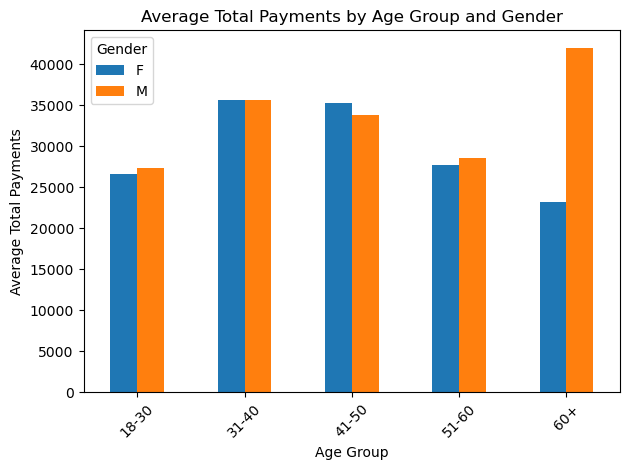

c:\Users\Srinika\anaconda3\envs\dev\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


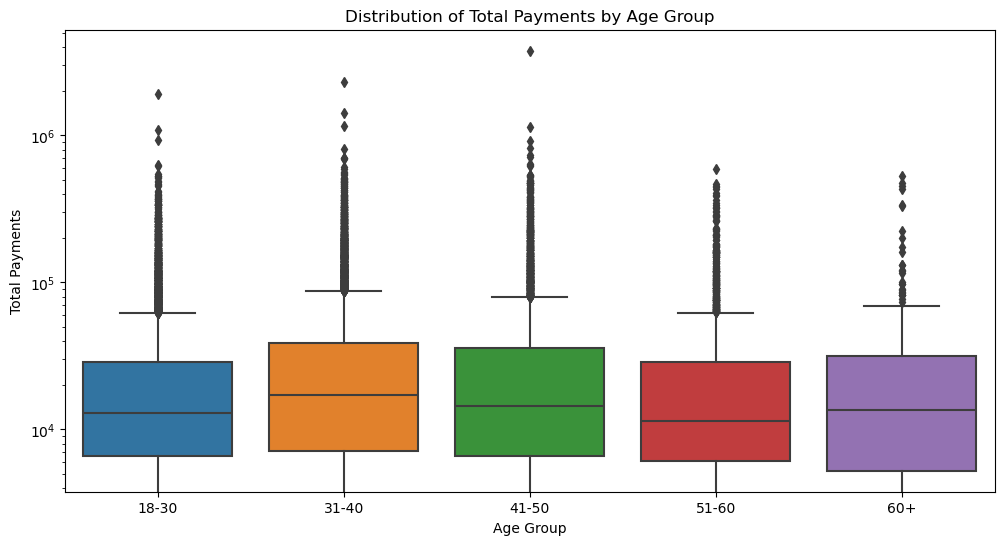

In [28]:
# Calculate total payments
merged_df['total_payments'] = merged_df[['payment_aug', 'payment_july', 'payment_june', 'payment_may', 'payment_april', 'payment_mar']].sum(axis=1)

# Age groups
merged_df['age_group'] = pd.cut(merged_df['age'], bins=[0, 30, 40, 50, 60, 100], labels=['18-30', '31-40', '41-50', '51-60', '60+'])

# Average payments by age group and gender
avg_payments = merged_df.groupby(['age_group', 'gender'])['total_payments'].mean().unstack()
print("Average payments by age group and gender:")
print(avg_payments)

# Correlation between age and total payments
correlation = merged_df['age'].corr(merged_df['total_payments'])
print(f"\
Correlation between age and total payments: {correlation:.2f}")

# Visualize average payments by age group and gender
plt.figure(figsize=(12, 6))
avg_payments.plot(kind='bar')
plt.title('Average Total Payments by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Average Total Payments')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Boxplot of total payments by age group

plt.figure(figsize=(12, 6))
sns.boxplot(x='age_group', y='total_payments', data=merged_df)
plt.title('Distribution of Total Payments by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Payments')
plt.yscale('log')  # Using log scale for better visualization
plt.show()

These insights suggest that while there are some differences in payment behavior across age groups and genders, the overall correlation between age and total payments is weak. 

The plot shows that the total payments distribution is fairly consistent across different age groups, with most people having similar payment amounts. However, in every age group, there are some individuals who have made much larger payments, as indicated by the presence of numerous outliers.

Correlation matrix:
                         credit_limit  total_statement_balance  total_payments
credit_limit                 1.000000                 0.302044        0.352655
total_statement_balance      0.302044                 1.000000        0.343906
total_payments               0.352655                 0.343906        1.000000


c:\Users\Srinika\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Srinika\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Srinika\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


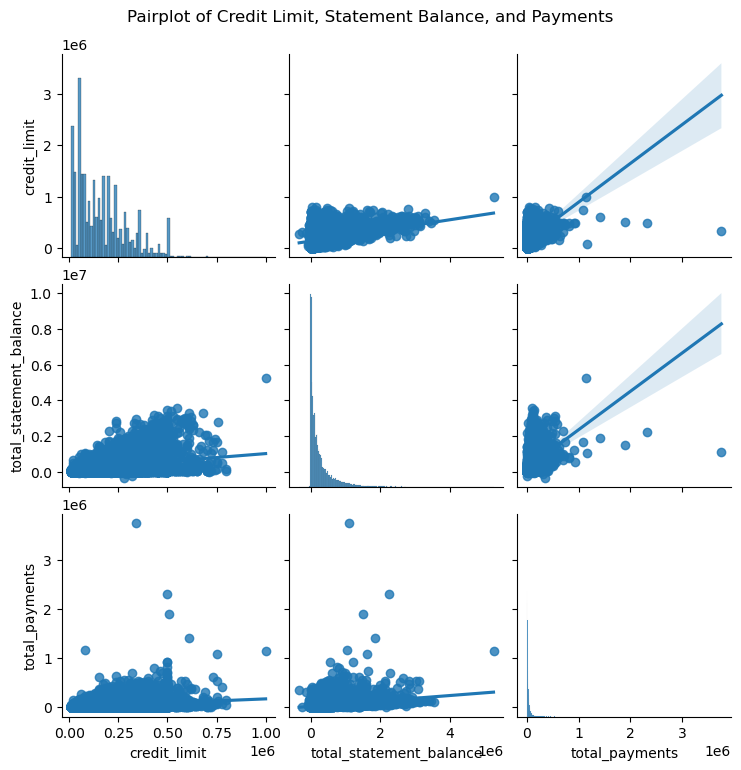

In [26]:
# Analyze the relationship between credit limit, statement balance, and payments

# Calculate total statement balance
merged_df['total_statement_balance'] = merged_df[['statement_bal_aug', 'statement_bal_jul', 'statement_bal_june', 'statement_bal_may', 'statement_bal_April', 'statement_bal_march']].sum(axis=1)

# Correlation between credit limit, total statement balance, and total payments
correlation_matrix = merged_df[['credit_limit', 'total_statement_balance', 'total_payments']].corr()
print("Correlation matrix:")
print(correlation_matrix)

# Visualize the relationship using pairplot
sns.pairplot(merged_df, vars=['credit_limit', 'total_statement_balance', 'total_payments'], kind='reg')
plt.suptitle('Pairplot of Credit Limit, Statement Balance, and Payments', y=1.02)
plt.show()

Summary:
Correlation Matrix:
There is a moderate positive correlation between credit limit and total payments (0.35).
The correlation between credit limit and total statement balance is also moderate (0.30).
Total statement balance and total payments have a moderate correlation (0.34).
These correlations suggest that as the credit limit increases, both the total statement balance and total payments tend to increase as well. However, the relationships are not very strong, indicating other factors may also be influencing these variables.